In [90]:
# pip install librosa
# pip install matplotlib
# pip install pandas
# pip install tqdm
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tqdm import tqdm

Configuración del dataset

In [64]:
DATASET_PATH = "data/genres_original/"
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 
          'metal', 'pop', 'reggae', 'rock']
SAMPLE_RATE = 22050 
DURATION = 30  
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

Procesamiento el dataset y extracción de coeficientes MFCCs

In [65]:
def extract_features(dataset_path, genres, n_mfcc=13):
    data = {
        "genre": [],
        "mfcc": [],
        "filename": []
    }
    
    for genre in genres:
        genre_path = os.path.join(dataset_path, genre)
        print(f"Procesando género: {genre}")
        
        for file_name in tqdm(os.listdir(genre_path)):
            file_path = os.path.join(genre_path, file_name)
            
            try:
                # Cargar el archivo de audio
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
                
                # Verificar que el archivo tenga la duración esperada
                if len(signal) >= SAMPLES_PER_TRACK:
                    # Extraer MFCCs
                    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
                    mfcc_mean = np.mean(mfcc.T, axis=0)  # Usar la media de las características
                    
                    # Guardar en el diccionario
                    data["genre"].append(genre)
                    data["mfcc"].append(mfcc_mean)
                    data["filename"].append(file_name)
            except Exception as e:
                print(f"Error procesando {file_path}: {e}")
                
    return pd.DataFrame(data)

In [68]:
# Extraer características
df = extract_features(DATASET_PATH, GENRES)

# Guardar en un archivo CSV
df.to_csv("features_gtzan.csv", index=False)
print("Archivo 'features_gtzan.csv' guardado exitosamente.")

Procesando género: blues


100%|██████████| 100/100 [00:03<00:00, 28.66it/s]


Procesando género: classical


100%|██████████| 100/100 [00:03<00:00, 29.26it/s]


Procesando género: country


100%|██████████| 100/100 [00:03<00:00, 27.33it/s]


Procesando género: disco


100%|██████████| 100/100 [00:03<00:00, 26.88it/s]


Procesando género: hiphop


100%|██████████| 100/100 [00:03<00:00, 27.27it/s]


Procesando género: jazz


 52%|█████▏    | 52/100 [00:01<00:01, 28.47it/s]C:\Users\alexa\AppData\Local\Temp\ipykernel_15752\2392870113.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
c:\Users\alexa\Desktop\proyectos_python\.venv\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 60%|██████    | 60/100 [00:02<00:01, 29.53it/s]

Error procesando data/genres_original/jazz\jazz.00054.wav: 


100%|██████████| 100/100 [00:03<00:00, 27.04it/s]


Procesando género: metal


100%|██████████| 100/100 [00:03<00:00, 26.58it/s]


Procesando género: pop


100%|██████████| 100/100 [00:03<00:00, 26.78it/s]


Procesando género: reggae


100%|██████████| 100/100 [00:03<00:00, 26.37it/s]


Procesando género: rock


100%|██████████| 100/100 [00:03<00:00, 26.57it/s]


Archivo 'features_gtzan.csv' guardado exitosamente.


In [ ]:
df = pd.read_csv("features_gtzan.csv")
df

,genre,mfcc,filename
0,blues,[-113.619385 121.55302 -19.151056 42.3...,blues.00000.wav
1,blues,[-207.58151 123.99715 8.939115 35.8...,blues.00001.wav
2,blues,[-90.776344 140.44861 -29.10056 31.68734...,blues.00002.wav
3,blues,[-199.462 150.09474 5.649167 26.8...,blues.00003.wav
4,blues,[-160.29185 126.19576 -35.6025 22.1...,blues.00004.wav
...,...,...,...
985,rock,[-153.61649 109.894516 -23.10659 59.0074...,rock.00095.wav
986,rock,[-142.44206 116.23844 -32.19032 49.1146...,rock.00096.wav
987,rock,[-125.06511 115.20331 -48.00468 52.8431...,rock.00097.wav
988,rock,[-224.99405 123.669685 -9.775933 56.6...,rock.00098.wav


Partición del dataset

In [92]:
# Convertir la columna 'mfcc' de cadenas a arrays NumPy
X = np.array([np.fromstring(row[1:-1], sep=' ') for row in df['mfcc']])
y = np.array(df["genre"].tolist())

# Convertir etiquetas a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de validación: {len(X_val)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 693
Tamaño del conjunto de validación: 148
Tamaño del conjunto de prueba: 149


Modelos de ML

In [105]:
# pip install seaborn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

1st MLM: Random Forest

In [103]:
# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Validar el modelo
y_val_pred = rf_model.predict(X_val)
print("Reporte de validación:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

Reporte de validación:
              precision    recall  f1-score   support

       blues       0.73      0.53      0.62        15
   classical       0.86      0.86      0.86        14
     country       0.71      0.80      0.75        15
       disco       0.53      0.60      0.56        15
      hiphop       0.42      0.36      0.38        14
        jazz       0.67      0.67      0.67        15
       metal       0.76      0.87      0.81        15
         pop       0.65      0.87      0.74        15
      reggae       0.59      0.67      0.62        15
        rock       0.88      0.47      0.61        15

    accuracy                           0.67       148
   macro avg       0.68      0.67      0.66       148
weighted avg       0.68      0.67      0.66       148



Reporte de prueba:
              precision    recall  f1-score   support

       blues       0.63      0.80      0.71        15
   classical       0.70      0.93      0.80        15
     country       0.30      0.21      0.25        14
       disco       0.50      0.53      0.52        15
      hiphop       0.42      0.53      0.47        15
        jazz       0.64      0.47      0.54        15
       metal       0.75      0.60      0.67        15
         pop       0.71      0.67      0.69        15
      reggae       0.62      0.53      0.57        15
        rock       0.47      0.47      0.47        15

    accuracy                           0.58       149
   macro avg       0.57      0.57      0.57       149
weighted avg       0.58      0.58      0.57       149



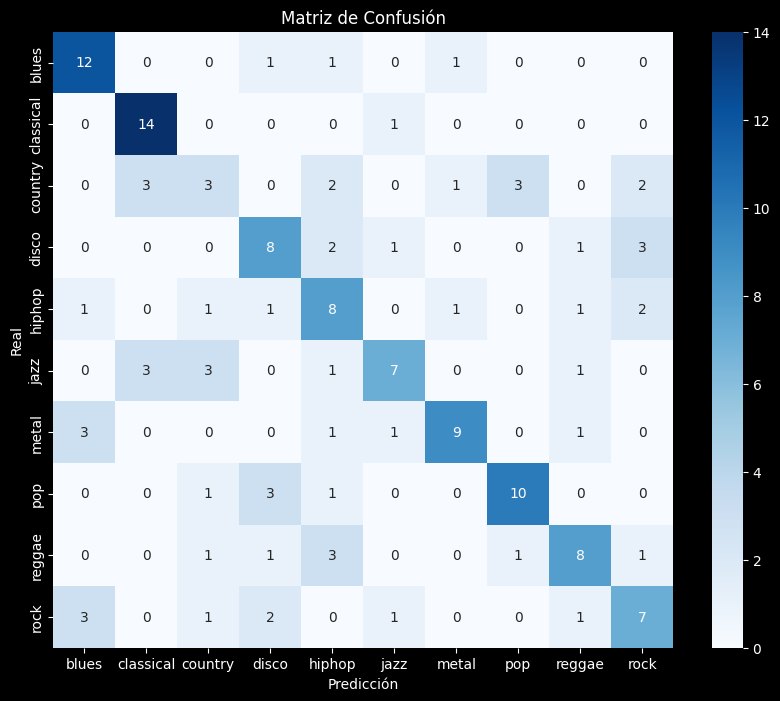

In [106]:
# Evaluar en los datos de prueba
y_test_pred = rf_model.predict(X_test)
print("Reporte de prueba:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()